In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


import os

In [2]:
df = pd.read_csv("./data/wine/wine.csv", sep=",")

In [3]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

normalized_df.to_csv('./data/wine/normalize.csv', index=False)

In [4]:
df = pd.read_csv("./data/wine/normalize.csv", sep=",")

In [5]:
df

,Class,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

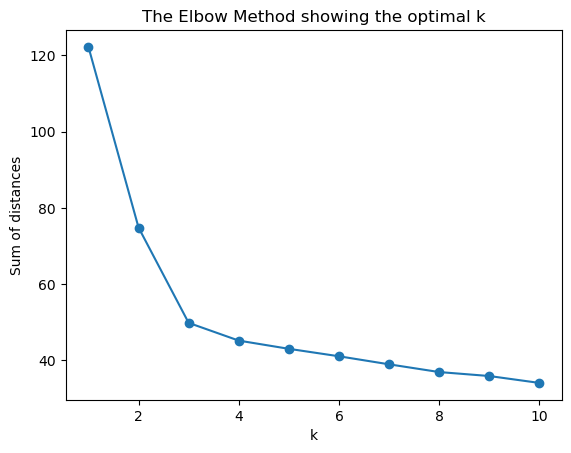

In [6]:
from sklearn.cluster import KMeans

K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Class,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
cluster,,,,,,,,,,,,,,
0,0.500000,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494
1,0.989796,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323
2,0.008333,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958


____________________________________

In [8]:
dff = df
linkedd = linkage(dff, 'ward', 'euclidean')
linkedd

array([[9.00000000e+00, 4.70000000e+01, 2.21202333e-01, 2.00000000e+00],
       [1.10000000e+01, 1.20000000e+01, 2.39911909e-01, 2.00000000e+00],
       [3.40000000e+01, 3.70000000e+01, 2.41690739e-01, 2.00000000e+00],
       [1.64000000e+02, 1.72000000e+02, 2.41863557e-01, 2.00000000e+00],
       [1.50000000e+01, 5.30000000e+01, 2.53936723e-01, 2.00000000e+00],
       [1.31000000e+02, 1.33000000e+02, 2.54715548e-01, 2.00000000e+00],
       [1.40000000e+02, 1.62000000e+02, 2.65406040e-01, 2.00000000e+00],
       [2.40000000e+01, 3.50000000e+01, 2.65815845e-01, 2.00000000e+00],
       [1.60000000e+01, 1.70000000e+01, 2.66633213e-01, 2.00000000e+00],
       [2.20000000e+01, 2.90000000e+01, 2.68951647e-01, 2.00000000e+00],
       [0.00000000e+00, 2.00000000e+01, 2.69639793e-01, 2.00000000e+00],
       [1.48000000e+02, 1.74000000e+02, 2.72376734e-01, 2.00000000e+00],
       [9.20000000e+01, 1.07000000e+02, 2.72545815e-01, 2.00000000e+00],
       [1.02000000e+02, 1.25000000e+02, 2.72848954e

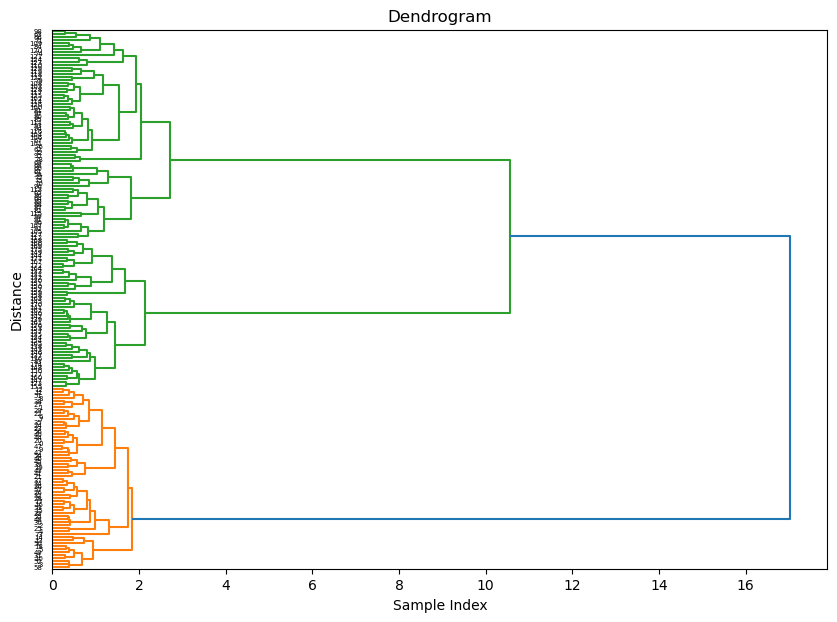

In [9]:
plt.figure(figsize=(10, 7))
dendrogram(linkedd, orientation='right')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [10]:
dff['cluster'] = fcluster(linkedd, 3, criterion='maxclust')
dff.groupby('cluster').size()

cluster
1    60
2    49
3    69
dtype: int64

In [11]:
dff.groupby('cluster').mean()

,Class,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
cluster,,,,,,,,,,,,,,
1,0.008333,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958
2,0.989796,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323
3,0.500000,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494


In [12]:
dist = linkedd[:, 2]
dist

array([ 0.22120233,  0.23991191,  0.24169074,  0.24186356,  0.25393672,
        0.25471555,  0.26540604,  0.26581584,  0.26663321,  0.26895165,
        0.26963979,  0.27237673,  0.27254582,  0.27284895,  0.27524462,
        0.27793996,  0.28391379,  0.28433696,  0.28709148,  0.28894641,
        0.29006724,  0.29772724,  0.30135389,  0.30907382,  0.31562649,
        0.3198473 ,  0.32037361,  0.32163735,  0.32195172,  0.32551045,
        0.33858987,  0.33929435,  0.34311065,  0.34455246,  0.3446281 ,
        0.3449292 ,  0.3486149 ,  0.35161041,  0.35219054,  0.35330026,
        0.35333565,  0.35373192,  0.35516875,  0.35741349,  0.35862282,
        0.3588576 ,  0.3605661 ,  0.36207193,  0.3632947 ,  0.36742079,
        0.36907906,  0.37075352,  0.37278446,  0.3752554 ,  0.3806791 ,
        0.3829089 ,  0.38402824,  0.38751448,  0.38824669,  0.38951498,
        0.39030419,  0.39189392,  0.39372905,  0.39492269,  0.39493366,
        0.39863723,  0.40032689,  0.40334232,  0.40760783,  0.41

Text(0, 0.5, 'Distance')

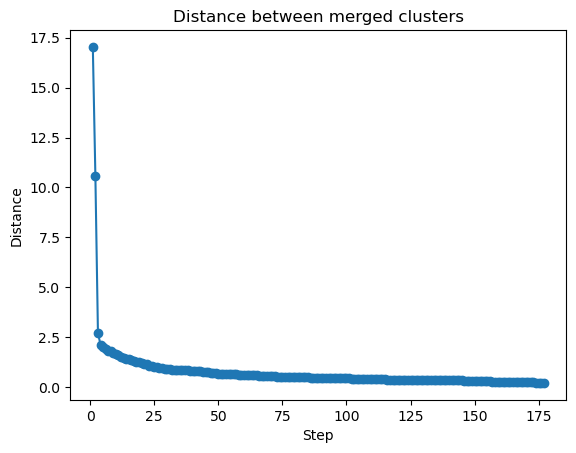

In [13]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')